In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from datetime import date
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_curve

/Users/Varvar/Desktop/env1/pythonenv1/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = pd.read_csv('KaggleV2-May-2016.csv')
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


Among the available data I chose 10 important attributes: Gender, Age, Neighbourhood, Scholarship, Hipertension,	Diabetes, Alcoholism, Handcap	SMS_received, quantity of days between schedule say and appointment day. 

In [3]:
df=np.array(df)
Y = df[:, -1]
Y = np.array(Y)

In [4]:
gender = df[:, 2]

days = []
for i in range (len(Y)):
    x0 = df[i, 3]
    x1 = df[i, 4]
    d0 = date(int(float(x0[0:4])), int(float(x0[5:7])),int(float(x0[8:10])))
    d1 = date(int(float(x1[0:4])), int(float(x1[5:7])),int(float(x1[8:10])))
    delta = d1 - d0
    days.append(delta.days)

age = df[:, 5]
neighbourhood = df[:, 6]
others = df[:, 7:-1]

#encode neighbourhood to float
encoder = preprocessing.LabelEncoder()
neighbourhood = encoder.fit_transform(neighbourhood)
gender = encoder.fit_transform(gender)

days = np.array(days)
gender = np.array(gender)
age = np.array(age)
neighbourhood = np.array(neighbourhood)
others = np.array(others)

X = np.column_stack((days, gender, age, neighbourhood, others))

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.75)

# Decision tree

In [6]:
from sklearn import tree

In [7]:
future_tree = tree.DecisionTreeClassifier()
future_tree.fit(X_train, Y_train)
#test the data
prediction = future_tree.predict(X_test)

In [8]:
m = confusion_matrix(Y_test,prediction)
TP = m[0][0]
FN = m[0][1]
Recall = (1.0*TP/(TP + FN))
print Recall

0.84207667587


In [9]:
#confusion matrix
confusion_matrix(Y_test,prediction)

array([[18604,  3489],
       [ 3776,  1763]])

In [10]:
importances = future_tree.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 0 (0.330706)
2. feature 2 (0.272076)
3. feature 3 (0.271849)
4. feature 1 (0.048378)
5. feature 5 (0.022836)
6. feature 9 (0.016145)
7. feature 4 (0.013976)
8. feature 6 (0.009698)
9. feature 8 (0.007869)
10. feature 7 (0.006466)


In [11]:
newX = np.column_stack((days, age, neighbourhood))
X_tr, X_te, Y_tr, Y_te = train_test_split(newX, Y, train_size=0.75)

In [12]:
future_tree = tree.DecisionTreeClassifier()
future_tree.fit(X_train, Y_train)
prediction = future_tree.predict(X_test)

In [13]:
m = confusion_matrix(Y_test,prediction)
TP = m[0][0]
FN = m[0][1]
Recall = (1.0*TP/(TP + FN))
print Recall

0.843072466392


# Random forest

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
#cross validation 
num_trees = [10,20,30,40,50,60,70,80,90,100]
rf_recall = []
for i in num_trees:
    rf_classifier = RandomForestClassifier(n_estimators = i)
    rf_classifier.fit(X_train, Y_train)
    rf_score = cross_val_score(rf_classifier, X_test, Y_test, cv=5)
    print "Cross Validation Score for n_estimators = {}: {:.2f}%".format(i,rf_score.mean()*100)

    random_forest_prediction = rf_classifier.predict(X_test)
    random_forest_matrix = confusion_matrix(Y_test, random_forest_prediction)
    print random_forest_matrix

    TP = random_forest_matrix[0][0]
    FN = random_forest_matrix[0][1]
    print TP, FN
    recall = (1.0*TP/(TP + FN))
    print "Recall: {:.2f}%\n".format(recall*100)
    rf_recall.append(recall*100)

Cross Validation Score for n_estimators = 10: 76.51%
[[20090  2003]
 [ 4388  1151]]
20090 2003
Recall: 90.93%

Cross Validation Score for n_estimators = 20: 76.68%
[[20058  2035]
 [ 4336  1203]]
20058 2035
Recall: 90.79%

Cross Validation Score for n_estimators = 30: 76.77%
[[20054  2039]
 [ 4309  1230]]
20054 2039
Recall: 90.77%

Cross Validation Score for n_estimators = 40: 76.77%
[[20058  2035]
 [ 4331  1208]]
20058 2035
Recall: 90.79%

Cross Validation Score for n_estimators = 50: 76.56%
[[20116  1977]
 [ 4327  1212]]
20116 1977
Recall: 91.05%

Cross Validation Score for n_estimators = 60: 76.71%
[[20069  2024]
 [ 4315  1224]]
20069 2024
Recall: 90.84%

Cross Validation Score for n_estimators = 70: 76.85%
[[20143  1950]
 [ 4331  1208]]
20143 1950
Recall: 91.17%

Cross Validation Score for n_estimators = 80: 76.89%
[[20128  1965]
 [ 4353  1186]]
20128 1965
Recall: 91.11%

Cross Validation Score for n_estimators = 90: 77.07%
[[20136  1957]
 [ 4367  1172]]
20136 1957
Recall: 91.14%

C

In [16]:
future_tree = RandomForestClassifier(n_estimators = 70)
future_tree.fit(X_train, Y_train)
prediction = future_tree.predict(X_test)

In [17]:
m = confusion_matrix(Y_test,prediction)
TP = m[0][0]
FN = m[0][1]
Recall = (1.0*TP/(TP + FN))
print Recall

0.911057801113


In [18]:
#confusion matrix
confusion_matrix(Y_test,prediction)

array([[20128,  1965],
       [ 4351,  1188]])

Feature ranking:
1. feature 0 (0.322019)
2. feature 2 (0.310423)
3. feature 3 (0.302696)
4. feature 1 (0.017937)
5. feature 9 (0.014598)
6. feature 5 (0.007902)
7. feature 6 (0.006747)
8. feature 8 (0.006382)
9. feature 4 (0.006099)
10. feature 7 (0.005197)


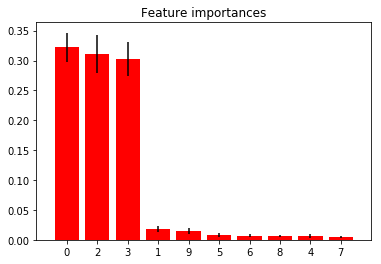

In [19]:
importances = future_tree.feature_importances_
std = np.std([tree.feature_importances_ for tree in future_tree.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [20]:
newX = np.column_stack((days, age, neighbourhood))
X_tr, X_te, Y_tr, Y_te = train_test_split(newX, Y, train_size=0.75)

In [21]:
#cross validation 
num_trees = [10,20,30,40,50,60,70,80,90,100]
rf_recall = []
for i in num_trees:
    rf_classifier = RandomForestClassifier(n_estimators = i)
    rf_classifier.fit(X_tr, Y_tr)
    rf_score = cross_val_score(rf_classifier, X_te, Y_te, cv=5)
    print "Cross Validation Score for n_estimators = {}: {:.2f}%".format(i,rf_score.mean()*100)

    random_forest_prediction = rf_classifier.predict(X_te)
    random_forest_matrix = confusion_matrix(Y_te, random_forest_prediction)
    print random_forest_matrix

    false_positive = random_forest_matrix[0][0]
    true_negative = random_forest_matrix[0][1]
    recall = (1.0*false_positive/(false_positive + true_negative))
    print "Recall: {:.2f}%\n".format(recall*100)
    rf_recall.append(recall*100)

Cross Validation Score for n_estimators = 10: 75.63%
[[19637  2323]
 [ 4268  1404]]
Recall: 89.42%

Cross Validation Score for n_estimators = 20: 75.93%
[[19700  2260]
 [ 4244  1428]]
Recall: 89.71%

Cross Validation Score for n_estimators = 30: 75.86%
[[19636  2324]
 [ 4244  1428]]
Recall: 89.42%

Cross Validation Score for n_estimators = 40: 75.80%
[[19727  2233]
 [ 4253  1419]]
Recall: 89.83%

Cross Validation Score for n_estimators = 50: 75.92%
[[19715  2245]
 [ 4249  1423]]
Recall: 89.78%

Cross Validation Score for n_estimators = 60: 75.87%
[[19765  2195]
 [ 4250  1422]]
Recall: 90.00%

Cross Validation Score for n_estimators = 70: 75.97%
[[19719  2241]
 [ 4240  1432]]
Recall: 89.80%

Cross Validation Score for n_estimators = 80: 76.17%
[[19743  2217]
 [ 4237  1435]]
Recall: 89.90%

Cross Validation Score for n_estimators = 90: 76.02%
[[19772  2188]
 [ 4254  1418]]
Recall: 90.04%

Cross Validation Score for n_estimators = 100: 75.92%
[[19750  2210]
 [ 4262  1410]]
Recall: 89.94%


In [22]:
future_tree = RandomForestClassifier(n_estimators = 90)
future_tree.fit(X_train, Y_train)
prediction = future_tree.predict(X_test)

In [23]:
m = confusion_matrix(Y_test,prediction)
TP = m[0][0]
FN = m[0][1]
Recall = (1.0*TP/(TP + FN))
print Recall

0.911827275608


In [24]:
#confusion matrix
confusion_matrix(Y_test,prediction)

array([[20145,  1948],
       [ 4341,  1198]])

# K-Nearest Neighbours

In [25]:
import sklearn.neighbors as knn

In [26]:
#scale 
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)

/Users/Varvar/Desktop/env1/pythonenv1/lib/python2.7/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [27]:
#cross-validation 
num_trees = [1,2,3,4,5,6,7,8,9,10, 11, 12, 13, 14, 15]
rf_recall = []
for i in num_trees:
    rf_classifier = knn.KNeighborsClassifier(n_neighbors = i)
    rf_classifier.fit(X_train, Y_train)
    rf_score = cross_val_score(rf_classifier, X_test, Y_test, cv=5)
    print "Cross Validation Score for n_neighbors = {}: {:.2f}%".format(i,rf_score.mean()*100)

    knn_prediction = rf_classifier.predict(X_test)
    knn_matrix = confusion_matrix(Y_test, knn_prediction)
    print knn_matrix

    TP = knn_matrix[0][0]
    FN = knn_matrix[0][1]
    recall = (1.0*TP/(TP + FN))
    print "Recall: {:.2f}%\n".format(recall*100)
    rf_recall.append(recall*100)

Cross Validation Score for n_neighbors = 1: 72.35%
[[18446  3647]
 [ 3673  1866]]
Recall: 83.49%

Cross Validation Score for n_neighbors = 2: 78.17%
[[21088  1005]
 [ 4860   679]]
Recall: 95.45%

Cross Validation Score for n_neighbors = 3: 75.86%
[[19646  2447]
 [ 4192  1347]]
Recall: 88.92%

Cross Validation Score for n_neighbors = 4: 78.50%
[[21104   989]
 [ 4894   645]]
Recall: 95.52%

Cross Validation Score for n_neighbors = 5: 77.11%
[[20272  1821]
 [ 4442  1097]]
Recall: 91.76%

Cross Validation Score for n_neighbors = 6: 78.79%
[[21221   872]
 [ 4986   553]]
Recall: 96.05%

Cross Validation Score for n_neighbors = 7: 77.81%
[[20648  1445]
 [ 4618   921]]
Recall: 93.46%

Cross Validation Score for n_neighbors = 8: 79.09%
[[21332   761]
 [ 5017   522]]
Recall: 96.56%

Cross Validation Score for n_neighbors = 9: 78.36%
[[20868  1225]
 [ 4772   767]]
Recall: 94.46%

Cross Validation Score for n_neighbors = 10: 79.17%
[[21432   661]
 [ 5078   461]]
Recall: 97.01%

Cross Validation Sc

In [29]:
KNN=knn.KNeighborsClassifier(n_neighbors=14)
KNN.fit(X_train, Y_train)
prediction = KNN.predict(X_test)

In [30]:
m = confusion_matrix(Y_test,prediction)
TP = m[0][0]
FN = m[0][1]
Recall = (1.0*TP/(TP + FN))
print Recall

0.975919974653


In [31]:
#confusion matrix
confusion_matrix(Y_test,prediction)

array([[21561,   532],
       [ 5160,   379]])